# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
$$
\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b
\\
\hat{y_i} = \mathbf{w}^{T} \cdot \mathbf{X} 
$$

- $\hat{y_i}$: 예측값
- $x$: 특성(feature-컬럼)
- $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 절편
- $p$: p 번째 특성(feature)/p번째 가중치
- $i$: i번째 관측치(sample)


# G:
X: 기온, y:월드콘 판매량 으로 설명    
X1-기온, X2: 광고 => 각 feature의 영향력=> 가중치 W1, W2    

ax + b : 선형관계=> 가설(통계)==>ML에선 알고리즘. a, b를 찾고 그것의 유의성 설명(통계), ML - 찾아서 예측하기.    

- 단순/다중 선형회귀 이야기도 한다.

## 손실(loss)함수/오차(error)함수/비용(cost)함수/목적(objective)함수

- 모델이 출력한 예측값과 실제 값 사이의 차이를 계산하는 함수
- 평가 지표로 사용되기도 하고 모델을 최적화하는데 사용된다.

## 최적화(Optimize)

- 손실함수의 값이 최소화 되도록 모델을 학습하는 과정.
- 최적화의 두가지 방법
    - 정규방정식
    - 경사하강법

### Boston DataSet
 - CRIM	: 지역별 범죄 발생률
 - ZN	: 25,000 평방피트를 초과하는 거주지역의 비율
 - INDUS: 비상업지역 토지의 비율
 - CHAS	: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
 - NOX	: 일산화질소 농도
 - RM	: 주택 1가구당 평균 방의 개수
 - AGE	: 1940년 이전에 건축된 소유주택의 비율
 - DIS	: 5개의 보스턴 고용센터까지의 접근성 지수
 - RAD	: 고속도로까지의 접근성 지수
 - TAX	: 10,000 달러 당 재산세율
 - PTRATIO : 지역별 교사 한명당 학생 비율
 - B	: 지역의 흑인 거주 비율
 - LSTAT: 하위계층의 비율(%)
 
 - MEDV	: Target.  본인 소유의 주택가격(중앙값) (단위: $1,000)


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target

In [2]:
df = pd.DataFrame(X, columns=boston.feature_names)
df['MEDV'] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

# G: 일단 나눠 놓고 
- 이걸 뒤에서 계속 사용하자.

## 전처리
선형회귀 모델사용시 전처리
- 범주형: 원핫 인코딩
- Feature Scaling을 통해서 각 컬럼들의 값의 단위를 맞춰준다.
    - StandardScaler를 사용해 scaling하는 경우 성능이 더 잘나오는 경향이 있다.

In [4]:
chas_df = pd.get_dummies(df['CHAS'])
chas_df.columns = ['CHAS_0', 'CHAS_1']
chas_df.head()

,CHAS_0,CHAS_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [5]:
df2 = df.join([chas_df])

In [6]:
df2 = df2.drop(columns='CHAS')

In [7]:
df2.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0


In [8]:
y = df2['MEDV']
X = df2.drop(columns='MEDV')
X.shape, y.shape

((506, 14), (506,))

In [9]:
np.random.seed(10)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
train_columns = X_train.columns
train_columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS_0', 'CHAS_1'],
      dtype='object')

In [12]:
# 선형 회귀 모델은 scale 영향을 많이 받는다.
# one hot encoding 한 뒤에 train/test 분리후 인코딩한다. (0,1 이 다른 값으로 바뀌지만 일관되게 바뀌어 모델에 영향을 주지 않는다.)
# 테스트 해보니 성능은 같게 나옴.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## LinearRegression
- 가장 기본적인 선형 회귀 모델

In [13]:
# 평가 지표 출력 함수
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
def print_metrics(y, y_pred, title=None):
    mse = np.round(mean_squared_error(y, y_pred), 3)
    rmse = np.round(np.sqrt(mse), 3)
    mae = np.round(mean_absolute_error(y, y_pred), 3)
    r2 = np.round(r2_score(y, y_pred), 3)
    if title:
        print(title)
    print(f"MSE:{mse}, RMSE:{rmse},MAE:{mae}, R2:{r2}")

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
lr.coef_.shape, lr.coef_

((14,),
 array([-1.16449629,  1.49915257, -0.05268964, -1.91400079,  2.08637507,
         0.45488752, -3.15772431,  2.71071007, -2.07814318, -1.7549281 ,
         1.08897073, -4.10237313, -0.24654802,  0.24654802]))

In [16]:
# 가중치(회귀계수)와 절편 조회
print('가중치')
lr.coef_ # 학습한 가중치

가중치


array([-1.16449629,  1.49915257, -0.05268964, -1.91400079,  2.08637507,
        0.45488752, -3.15772431,  2.71071007, -2.07814318, -1.7549281 ,
        1.08897073, -4.10237313, -0.24654802,  0.24654802])

In [17]:
train_columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS_0', 'CHAS_1'],
      dtype='object')

In [18]:
print('절편')
lr.intercept_

절편


21.84183168316832

In [19]:
# 예측
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

print_metrics(y_train, pred_train, title='LinearRegressor: Train')
print_metrics(y_test, pred_test, title="LinearRegressor: Trest")


LinearRegressor: Train
MSE:19.231, RMSE:4.385,MAE:3.083, R2:0.75
LinearRegressor: Trest
MSE:34.414, RMSE:5.866,MAE:4.061, R2:0.671


In [23]:
pred_test.min()

-5.348839279428589

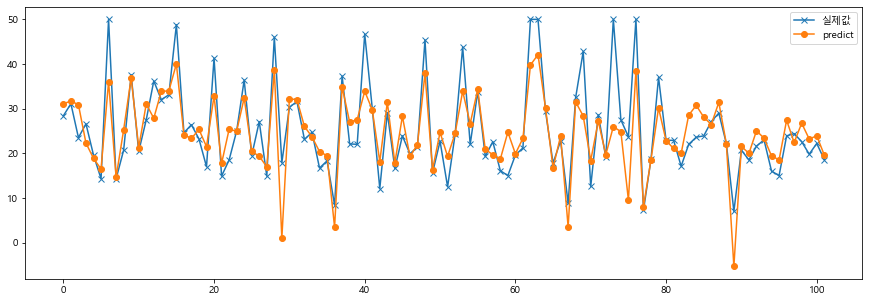

In [25]:
# 실제 값과 예측 가격을 plotting (Test Set 예측결과로)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test)), y_test, label='실제값', marker='x')
plt.plot(range(len(pred_test)), pred_test, label='predict', marker='o')
plt.legend()
plt.show()

## 다항회귀(Polynomial Regression)
- 단순한 직선형 보다 복잡한 비선형의 데이터셋을 학습하기 위한 방식
- Feature들을 거듭제곱한 것과 Feature들을 곱한 새로운 특성을 추가한 뒤 선형모델로 훈련시킨다.
- `PolynomialFeatures` Transformer 를 사용.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'malgun gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [30]:
m = 100
X = 6 * np.random.rand(m, 1) - 3 # shape(100,1), 0 ~ 1사이의 실수
y = X**2 + X + 2 + np.random.normal(0,1,size=(m,1))

In [32]:
X.shape, y.shape

((100, 1), (100, 1))

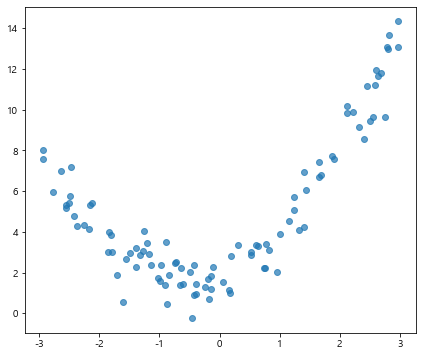

In [34]:
plt.figure(figsize=(7,6))
plt.scatter(X,y,alpha=0.7)
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr.fit(X,y)
lr.coef_, lr.intercept_

(array([[1.22869197]]), array([4.87468669]))

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
pred = lr.predict(X)
print(mean_squared_error(y,pred), r2_score(y,pred))

8.203487578441269 0.3510012536982259


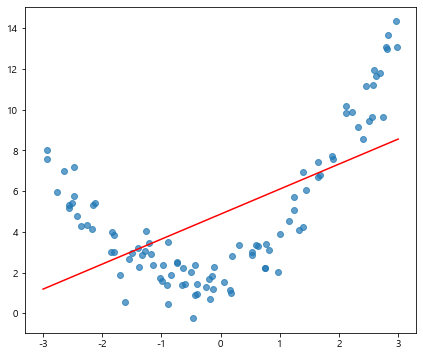

In [41]:
X_new = np.linspace(-3,3,100).reshape(-1,1)
pred_new = lr.predict(X_new)

plt.figure(figsize=(7,6))

plt.scatter(X,y,alpha=0.7)

plt.plot(X_new, pred_new, color='red')

plt.show()

In [42]:
# X의 Feature를 늘려서 다항식이 되도록 처리.
from sklearn.preprocessing import PolynomialFeatures


In [54]:
# degree: 최고차항의 수를 지정.
poly_f = PolynomialFeatures(degree=2, include_bias=False) # include_bias: 상수항(1로된 항) 추가 여부 (Default: True)
X_poly = poly_f.fit_transform(X)

In [55]:
X.shape, X_poly.shape

((100, 1), (100, 2))

In [56]:
X_poly

array([[-1.39202397e+00,  1.93773074e+00],
       [-9.05186758e-01,  8.19363067e-01],
       [-4.26724232e-01,  1.82093570e-01],
       [-1.91777220e-01,  3.67785023e-02],
       [ 5.24951753e-01,  2.75574343e-01],
       [-4.96267781e-01,  2.46281711e-01],
       [ 6.32781824e-01,  4.00412837e-01],
       [-8.82135920e-01,  7.78163781e-01],
       [ 2.40718495e+00,  5.79453938e+00],
       [-7.33683214e-01,  5.38291058e-01],
       [ 1.00335794e+00,  1.00672715e+00],
       [-6.57716010e-01,  4.32590350e-01],
       [-1.70581157e+00,  2.90979313e+00],
       [-2.55379857e+00,  6.52188713e+00],
       [ 2.12533589e+00,  4.51705266e+00],
       [-1.17534095e+00,  1.38142636e+00],
       [ 6.02601944e-01,  3.63129103e-01],
       [-1.61257418e+00,  2.60039549e+00],
       [-2.50699191e+00,  6.28500844e+00],
       [ 2.59988733e+00,  6.75941413e+00],
       [-3.91500440e-01,  1.53272595e-01],
       [ 2.82809158e+00,  7.99810198e+00],
       [ 2.96245862e+00,  8.77616110e+00],
       [ 1.

In [47]:
X

array([[-1.39202397],
       [-0.90518676],
       [-0.42672423],
       [-0.19177722],
       [ 0.52495175],
       [-0.49626778],
       [ 0.63278182],
       [-0.88213592],
       [ 2.40718495],
       [-0.73368321],
       [ 1.00335794],
       [-0.65771601],
       [-1.70581157],
       [-2.55379857],
       [ 2.12533589],
       [-1.17534095],
       [ 0.60260194],
       [-1.61257418],
       [-2.50699191],
       [ 2.59988733],
       [-0.39150044],
       [ 2.82809158],
       [ 2.96245862],
       [ 1.65092076],
       [ 2.63069693],
       [-1.26358873],
       [-1.33112419],
       [-2.42635875],
       [-0.89219182],
       [ 1.65170585],
       [ 0.52838648],
       [-0.17689706],
       [-1.84879941],
       [ 1.24385067],
       [-2.17518572],
       [ 2.45006162],
       [-0.46471273],
       [-2.77078679],
       [-1.83478339],
       [-0.60400594],
       [ 0.75664129],
       [-0.39206918],
       [-2.47556939],
       [ 1.39981821],
       [-2.16274384],
       [ 0

In [57]:
# 생성된 컬럼들이 어떻게 생성되었는지 확인 - 컬럼의 이름
poly_f.get_feature_names()

['x0', 'x0^2']

In [58]:
lr2 = LinearRegression()
lr2.fit(X_poly, y)

lr2.coef_, lr2.intercept_

(array([[1.00331221, 1.00123931]]), array([1.92687465]))

In [59]:
pred2 = lr2.predict(X_poly)
print(mean_squared_error(y,pred2), r2_score(y,pred2))

0.7656220895725052 0.9394296911499788


In [67]:
X_new_poly = poly_f.transform(X_new)
# X_new_poly.shape
y_new2 = lr2.predict(X_new_poly)

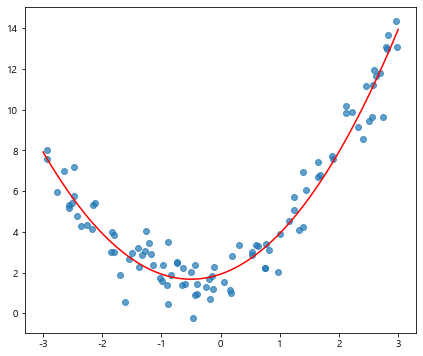

In [71]:
plt.figure(figsize=(7,6))

plt.scatter(X,y,alpha=0.7)

plt.plot(X_new, y_new2, color='red')

plt.show()

In [74]:
# 컬럼이 여러개일때
data = np.arange(9).reshape(3,3)
data.shape

(3, 3)

In [90]:
poly_f2 = PolynomialFeatures(degree=3, include_bias=False)
data_poly = poly_f2.fit_transform(data)
data_poly.shape

(3, 19)

In [84]:
data

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [89]:
data_poly

array([[ 0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
       [ 3.,  4.,  5.,  9., 12., 15., 16., 20., 25.],
       [ 6.,  7.,  8., 36., 42., 48., 49., 56., 64.]])

In [86]:
poly_f2.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [91]:
data_poly

array([[  0.,   1.,   2.,   0.,   0.,   0.,   1.,   2.,   4.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   2.,   4.,   8.],
       [  3.,   4.,   5.,   9.,  12.,  15.,  16.,  20.,  25.,  27.,  36.,
         45.,  48.,  60.,  75.,  64.,  80., 100., 125.],
       [  6.,   7.,   8.,  36.,  42.,  48.,  49.,  56.,  64., 216., 252.,
        288., 294., 336., 384., 343., 392., 448., 512.]])

In [ ]:
array([[  0.,   1.,   2.,   0.,   0.,   0.,   1.,   2.,   4.,   0.,   0., 0.,   0.,   0.,   0.,   1.,   2.,   4.,   8.],
       [  3.,   4.,   5.,   9.,  12.,  15.,  16.,  20.,  25.,  27.,  36., 45.,  48.,  60.,  75.,  64.,  80., 100., 125.],
       [  6.,   7.,   8.,  36.,  42.,  48.,  49.,  56.,  64., 216., 252., 288., 294., 336., 384., 343., 392., 448., 512.]])

In [92]:
poly_f2.get_feature_names()

['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3']

In [107]:
# 다항회귀를 Boston Dataset에 적용
poly_f = PolynomialFeatures(degree=5, include_bias=False)
X_train_scaled_poly = poly_f.fit_transform(X_train_scaled)
X_test_scaled_poly = poly_f.transform(X_test_scaled)
X_train_scaled.shape, X_train_scaled_poly.shape

((404, 14), (404, 11627))

In [108]:
lr = LinearRegression()
lr.fit(X_train_scaled_poly, y_train)

LinearRegression()

In [109]:
pred_train2 = lr.predict(X_train_scaled_poly)
pred_test2 = lr.predict(X_test_scaled_poly)

In [105]:
print('polynomialFeature 적용전 결과')
print_metrics(y_train, pred_train, title='Train')
print_metrics(y_test, pred_test, title='test')


polynomialFeature 적용전 결과
Train
MSE:19.231, RMSE:4.385,MAE:3.083, R2:0.75
test
MSE:34.414, RMSE:5.866,MAE:4.061, R2:0.671


In [106]:
print('polynomialFeature 적용후 결과, degree=2')
print_metrics(y_train, pred_train2, title='Train')
print_metrics(y_test, pred_test2, title='test')

polynomialFeature 적용후 결과
Train
MSE:5.239, RMSE:2.289,MAE:1.673, R2:0.932
test
MSE:13.073, RMSE:3.616,MAE:2.818, R2:0.875


In [110]:
print('polynomialFeature 적용후 결과, degree=5')
print_metrics(y_train, pred_train2, title='Train')
print_metrics(y_test, pred_test2, title='test')

polynomialFeature 적용후 결과, degree=5
Train
MSE:0.0, RMSE:0.0,MAE:0.0, R2:1.0
test
MSE:1553.112, RMSE:39.41,MAE:14.177, R2:-13.851


# Guide
- l1: 라쏘, l2: 릿지

## 규제 (Regularization)
- 선형 회귀 모델에서 과적합 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용하는 것.
- 입력데이터의 Feature들이 너무 많은 경우 과적합이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 과적합이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.
    

## Ridge Regression
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 output에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

In [20]:
from sklearn.linear_model import Ridge

ridge_1 = Ridge() #alpha : 기본값 - 1
# ridge_1 = Ridge(alpha=25)
ridge_1.fit(X_train_scaled, y_train)

pred_train = ridge_1.predict(X_train_scaled)
pred_test = ridge_1.predict(X_test_scaled)

In [21]:
print_metrics(y_train, pred_train, title='Ridge alpha 1: Train')
print_metrics(y_test, pred_test, title="Ridge alpha 1: Trest")

Ridge alpha 1: Train
MSE:19.233, RMSE:4.386,MAE:3.079, R2:0.75
Ridge alpha 1: Trest
MSE:34.392, RMSE:5.864,MAE:4.058, R2:0.671


## GridSearchCV 

In [22]:
from sklearn.model_selection import GridSearchCV
param = {'alpha':[0.01, 0.1,0.5,1,10,20,30,40,50,100]}
ridge = Ridge()
gs = GridSearchCV(ridge, param_grid = param, cv = 5, n_jobs=-1, scoring=['r2','neg_mean_squared_error'], refit='r2')

In [23]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10, 20, 30, 40, 50, 100]},
             pre_dispatch='2*n_jobs', refit='r2', return_train_score=False,
             scoring=['r2', 'neg_mean_squared_error'], verbose=0)

In [24]:
import pandas as pd
cv_result = pd.DataFrame(gs.cv_results_).sort_values('rank_test_neg_mean_squared_error')
cv_result.filter(like='mean_test').join(cv_result.filter(like='param'))

,mean_test_r2,mean_test_neg_mean_squared_error,param_alpha,params
3,0.718794,-21.376445,1,{'alpha': 1}
2,0.718655,-21.385044,0.5,{'alpha': 0.5}
1,0.718526,-21.393176,0.1,{'alpha': 0.1}
4,0.718805,-21.394979,10,{'alpha': 10}
0,0.718495,-21.395170,0.01,{'alpha': 0.01}
5,0.716538,-21.573478,20,{'alpha': 20}
6,0.713520,-21.804009,30,{'alpha': 30}
7,0.710194,-22.056093,40,{'alpha': 40}
8,0.706720,-22.318945,50,{'alpha': 50}
9,0.688732,-23.681505,100,{'alpha': 100}


In [25]:
#Guide
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
# g = GradientBoostingRegressor(n_estimators=100, max_depth=3)
g = XGBRegressor(n_estimators=100, max_depth=3)
g.fit(X_train_scaled, y_train)
print(mean_squared_error(y_train, g.predict(X_train_scaled)))
print(mean_squared_error(y_test, g.predict(X_test_scaled)))

[05:17:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1.9694600634348471
12.236155909136382


In [26]:
pd.Series(g.feature_importances_, index=X_train.columns).sort_values(ascending=False)

LSTAT      0.591311
RM         0.183890
PTRATIO    0.055173
NOX        0.039627
DIS        0.034638
CRIM       0.023949
TAX        0.021529
B          0.014728
RAD        0.010282
AGE        0.007875
INDUS      0.006876
CHAS_0     0.006686
ZN         0.003435
CHAS_1     0.000000
dtype: float32

## 규제 alpha 에 따른 weight 변화

	**Ridge alpha 0: Train**
MSE:19.309, RMSE:4.394,MAE:3.087, R2:0.749
	**Ridge alpha  0: Test**
MSE:34.77, RMSE:5.897,MAE:4.073, R2:0.668
--------------------------------------------------
	**Ridge alpha 0.1: Train**
MSE:19.231, RMSE:4.385,MAE:3.083, R2:0.75
	**Ridge alpha  0.1: Test**
MSE:34.412, RMSE:5.866,MAE:4.061, R2:0.671
--------------------------------------------------
	**Ridge alpha 1: Train**
MSE:19.233, RMSE:4.386,MAE:3.079, R2:0.75
	**Ridge alpha  1: Test**
MSE:34.392, RMSE:5.864,MAE:4.058, R2:0.671
--------------------------------------------------
	**Ridge alpha 10: Train**
MSE:19.344, RMSE:4.398,MAE:3.051, R2:0.749
	**Ridge alpha  10: Test**
MSE:34.304, RMSE:5.857,MAE:4.037, R2:0.672
--------------------------------------------------
	**Ridge alpha 100: Train**
MSE:21.586, RMSE:4.646,MAE:3.109, R2:0.72
	**Ridge alpha  100: Test**
MSE:36.307, RMSE:6.026,MAE:4.153, R2:0.653
--------------------------------------------------
	**Ridge alpha 200: Train**
MSE:23.931, RMSE:4.89

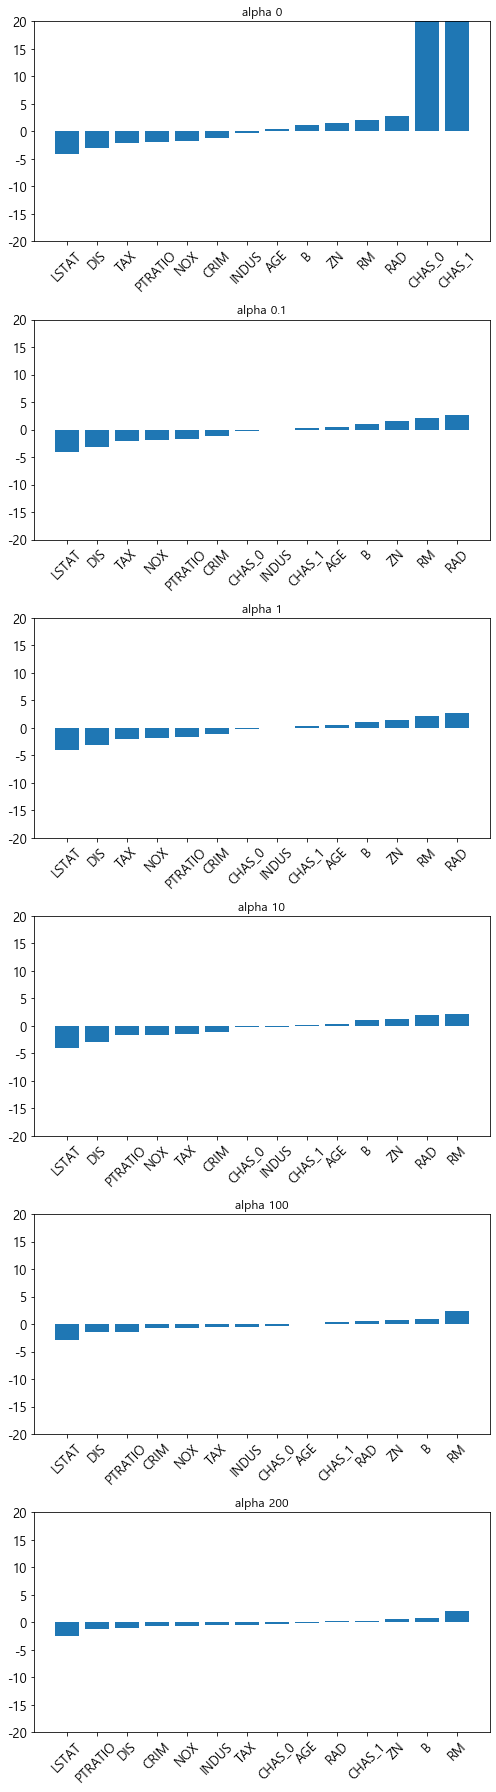

In [27]:
import matplotlib.pyplot as plt
np.random.seed(1)
alpha_list = [0, 0.1, 1, 10, 100,200]
coef_df = pd.DataFrame()

plt.figure(figsize=(7,25))
for idx, alpha in enumerate(alpha_list, start=1):
#     print(alpha)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    
    pred_train = ridge.predict(X_train_scaled)
    pred_test = ridge.predict(X_test_scaled)

    print_metrics(y_train, pred_train, title=f'\t**Ridge alpha {alpha}: Train**')
    print_metrics(y_test, pred_test, title=f"\t**Ridge alpha  {alpha}: Test**")
    print("-"*50)
    w = pd.Series(np.round(ridge.coef_,3), index=X_train.columns).sort_values()
    coef_df[f'alpha {alpha}'] = w
    plt.subplot(6,1,idx)
    
    plt.bar(x=w.index, height=w)
    plt.xticks(rotation=45)
    plt.ylim(-20, 20) # y를 고정해야 변화가 잘 보인다.
    plt.title(f"alpha {alpha}")

plt.tight_layout() #간격 자동조절
plt.show()

In [28]:
coef_df

,alpha 0,alpha 0.1,alpha 1,alpha 10,alpha 100,alpha 200
LSTAT,-4.021000e+00,-4.100,-4.082,-3.915,-2.956,-2.428
DIS,-3.042000e+00,-3.154,-3.122,-2.832,-1.475,-0.933
TAX,-2.030000e+00,-2.070,-1.999,-1.489,-0.543,-0.455
PTRATIO,-1.867000e+00,-1.754,-1.746,-1.681,-1.389,-1.223
NOX,-1.687000e+00,-1.911,-1.881,-1.631,-0.776,-0.573
CRIM,-1.218000e+00,-1.163,-1.153,-1.071,-0.779,-0.671
INDUS,-2.270000e-01,-0.055,-0.076,-0.218,-0.464,-0.499
AGE,5.080000e-01,0.454,0.441,0.341,-0.031,-0.154
B,1.127000e+00,1.089,1.088,1.078,0.935,0.802
ZN,1.579000e+00,1.497,1.477,1.318,0.778,0.633


## Lasso(Least Absolut Shrinkage and Selection Operator) Regression

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

In [30]:
from sklearn.linear_model import Lasso


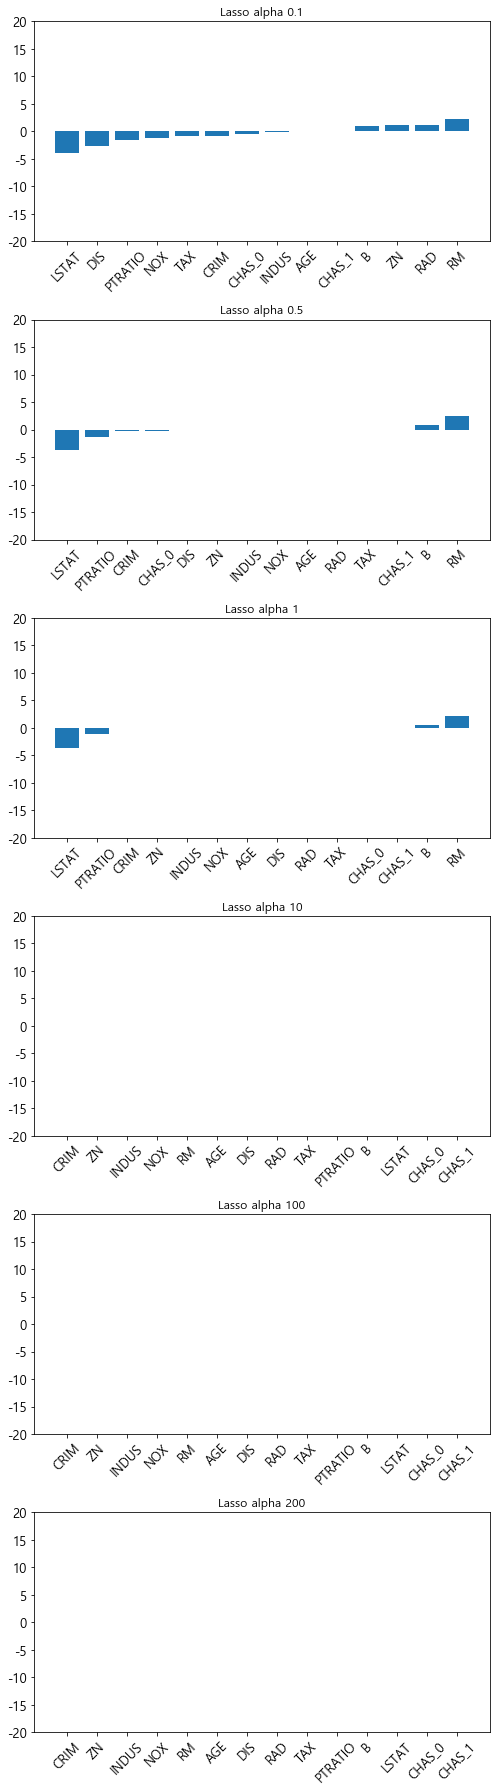

In [31]:
import matplotlib.pyplot as plt
alpha_list = [0.1, 0.5, 1, 10, 100, 200]

lasso_coef_df = pd.DataFrame()

plt.figure(figsize=(7,25))
for idx, alpha in enumerate(alpha_list, start=1):
    ridge = Lasso(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    
    w = pd.Series(ridge.coef_, index=X_train.columns).sort_values()
    lasso_coef_df[f'alpha {alpha}'] = w
    plt.subplot(6,1,idx)
    
    plt.bar(x=w.index, height=w)
    plt.xticks(rotation=45)
    plt.ylim(-20, 20)
    plt.title(f"Lasso alpha {alpha}")
    
plt.tight_layout() #간격 자동조절
plt.show()    

In [32]:
lasso_coef_df

,alpha 0.1,alpha 0.5,alpha 1,alpha 10,alpha 100,alpha 200
LSTAT,-3.953760e+00,-3.786105,-3.716066,-0.0,-0.0,-0.0
DIS,-2.583343e+00,-0.146112,-0.000000,0.0,0.0,0.0
PTRATIO,-1.586031e+00,-1.381795,-1.134171,-0.0,-0.0,-0.0
NOX,-1.285815e+00,-0.000000,-0.000000,-0.0,-0.0,-0.0
TAX,-8.893142e-01,-0.000000,-0.000000,-0.0,-0.0,-0.0
CRIM,-8.702606e-01,-0.273581,-0.012648,-0.0,-0.0,-0.0
CHAS_0,-4.815937e-01,-0.227676,-0.000000,-0.0,-0.0,-0.0
INDUS,-1.218122e-01,-0.000000,-0.000000,-0.0,-0.0,-0.0
AGE,0.000000e+00,0.000000,-0.000000,-0.0,-0.0,-0.0
CHAS_1,7.035077e-17,0.000000,0.000000,0.0,0.0,0.0


## 엘라스틱넷
- 릿지와 라쏘를 절충한 모델.
- 규제항에 릿지, 회귀 규제항을 더해서 추가한다. 
- 혼합뷰율 $r$을 사용해 혼합정도를 조절
- $r=0$이면 릿지와 같고 $r=1$이면 라쏘와 같다.

$$
\text{손실함수}(w) = \text{MSE}(w) + r\alpha \sum_{i=1}^{n}{\left| w_i \right|}  + \cfrac{1-r}{2}\alpha\sum_{i=1}^{n}{w_{i}^{2}}
$$

In [38]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.6) #alpha 페날티, l1_ratio: 비율(라쏘쪽. 위의것으로 보면 앞의것의 r 지정.)
elastic.fit(X_train_scaled, y_train)

pred_train = elastic.predict(X_train_scaled)
pred_test = elastic.predict(X_test_scaled)

print_metrics(y_train, pred_train, title='ElasticNet alpha 0.1: Train')
print_metrics(y_test, pred_test, title="ElasticNet alpha 0.1: Trest")

ElasticNet alpha 0.1: Train
MSE:19.854, RMSE:4.456,MAE:3.039, R2:0.742
ElasticNet alpha 0.1: Trest
MSE:34.342, RMSE:5.86,MAE:4.025, R2:0.672


# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 릿지를 사용한다.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 라쏘 사용한다. 
- 특성 수가 학습 샘플 수 보다 많거나 feature간에 연관성이 높을 때는 엘라스틱넷을 사용한다.